##### Data Loading and inspection

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# The below is needed for pandas to be able to read Excel files
!pip install openpyxl
from IPython.display import display
print('Setup completed successfully.')


Setup completed successfully.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
df = pd.read_csv(r'C:\Users\User\ML_Projects\data\Titanic-Dataset.csv')
test_df = pd.read_csv(r'C:\Users\User\ML_Projects\data\test.csv')
# Showing the first five rows of the DataFrame
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# General information about the DataFrame
print(f'The DataFrame has {df.shape[0]} rows, and {df.shape[1]} columns.\n')
display(df.info())
# Dispalying the DF's columns names as a list
col_names = df.columns.to_list()
print(col_names)
# Statistical summary of the DataFrame
display(df.describe().T)


The DataFrame has 891 rows, and 12 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


#### Data Cleaning 


In [5]:
# Renaming some columns for better clarity
df = df.rename(columns={'Pclass':'Passenger_Class',
                        'SibSp':'Siblings_Spouses_No.',
                        'Parch':'Parents_Children_No.'})

# Identifying numerical and categorical columns
numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(exclude=np.number).columns
print(f'Numerical columns in DataFrame:\n{numerical_cols.to_list()}')
print('---'*20)
print(f'Categorical columns in the DataFrame:\n{categorical_cols.to_list()}')
print('---'*20,'\n')

# checking for the missing values in the DataFrame
#print(f'The number of missing values in each column is:\n{df.isna().sum().sort_values(ascending=False)}')
display(f'Duplicated values are: {df.duplicated().sum()}')

# Missing values percentage in each column
print('---'*20)
print(f'The percentage of missing values in each column is:\n {(((df.isna().sum())/df.shape[0])).sort_values(ascending=False)}')

# handling missing values in the DataFrame
df = df.drop(columns=['Cabin'],errors='ignore')
categorical_cols = df.select_dtypes(exclude=np.number).columns

for col in numerical_cols:
    if df[col].isna().sum() > 0:
        df[col].fillna(df[col].median(),inplace=True)
    else:
        pass
for col in categorical_cols:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        pass

# Another approach to handle missing values
'''for col in df.columns:
    if df[col].isna().sum() > 0:
        if col in numerical_cols:
            df[col] = df[col].fillna(df[col].mean())
        elif col in categorical_cols:
            df[col] = df[col].fillna(df[col].mode()[0])'''

# Another approach to handle missing values, to be used if we didnt define 
# numerical_cols and categorical_cols
'''for col in df.columns:
    if df[col].dtype in ['int64','float64','Int64']:
        if df[col].isna().sum() > 0:
            df[col] = df[col].fillna(df[col].mean())
        else:
            continue
    elif df[col].dtype in ['object','category']:
        if df[col].isna().sum() > 0:
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            continue'''

# Verifying that there are no missing values in the DataFrame
print(f'The number of missing values after handling is:\n{df.isna().sum().sort_values(ascending=False)}')


Numerical columns in DataFrame:
['PassengerId', 'Survived', 'Passenger_Class', 'Age', 'Siblings_Spouses_No.', 'Parents_Children_No.', 'Fare']
------------------------------------------------------------
Categorical columns in the DataFrame:
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
------------------------------------------------------------ 



'Duplicated values are: 0'

------------------------------------------------------------
The percentage of missing values in each column is:
 Cabin                   0.771044
Age                     0.198653
Embarked                0.002245
PassengerId             0.000000
Name                    0.000000
Passenger_Class         0.000000
Survived                0.000000
Sex                     0.000000
Parents_Children_No.    0.000000
Siblings_Spouses_No.    0.000000
Fare                    0.000000
Ticket                  0.000000
dtype: float64
The number of missing values after handling is:
PassengerId             0
Survived                0
Passenger_Class         0
Name                    0
Sex                     0
Age                     0
Siblings_Spouses_No.    0
Parents_Children_No.    0
Ticket                  0
Fare                    0
Embarked                0
dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_19408\3550039270.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(),inplace=True)


In [6]:
for col in df.columns.to_list():
    print(f'The Data type of {col} is: {df[col].dtype}')
    print('\n','----'*10,'\n')
# Converting Data types if needed
df['Passenger_Class'] = df['Passenger_Class'].astype('object')
df['Survived'] = df['Survived'].astype('object')

numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(exclude=np.number).columns
print(f'Numerical columns after converting data types are:\n {numerical_cols.to_list()}')
print('---'*20)
print(f'Categorical columns after converting data types are:\n {tuple(categorical_cols)}')


The Data type of PassengerId is: int64

 ---------------------------------------- 

The Data type of Survived is: int64

 ---------------------------------------- 

The Data type of Passenger_Class is: int64

 ---------------------------------------- 

The Data type of Name is: object

 ---------------------------------------- 

The Data type of Sex is: object

 ---------------------------------------- 

The Data type of Age is: float64

 ---------------------------------------- 

The Data type of Siblings_Spouses_No. is: int64

 ---------------------------------------- 

The Data type of Parents_Children_No. is: int64

 ---------------------------------------- 

The Data type of Ticket is: object

 ---------------------------------------- 

The Data type of Fare is: float64

 ---------------------------------------- 

The Data type of Embarked is: object

 ---------------------------------------- 

Numerical columns after converting data types are:
 ['PassengerId', 'Age', 'Siblings_Sp

##### Univariate Analysis

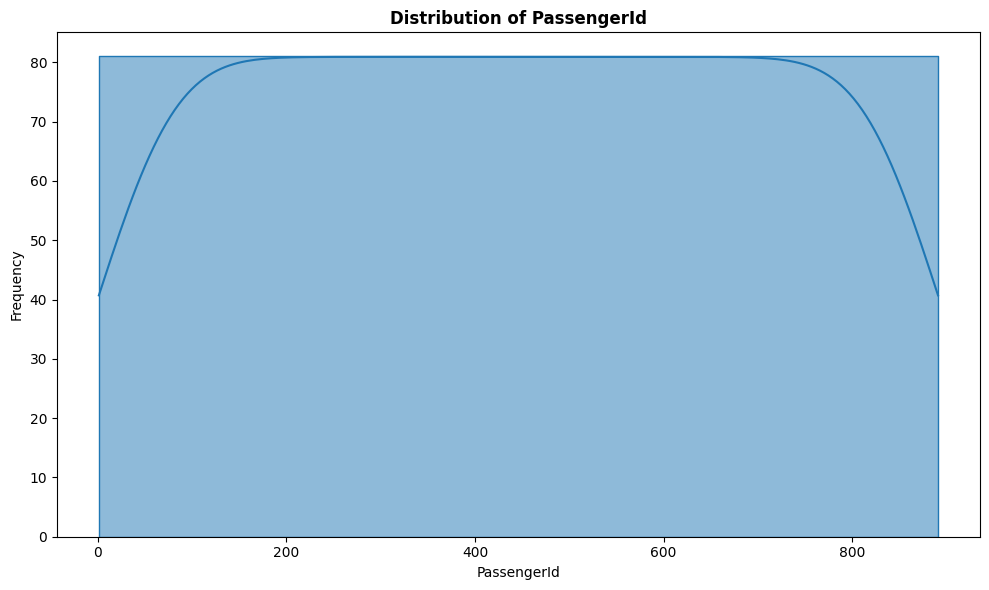

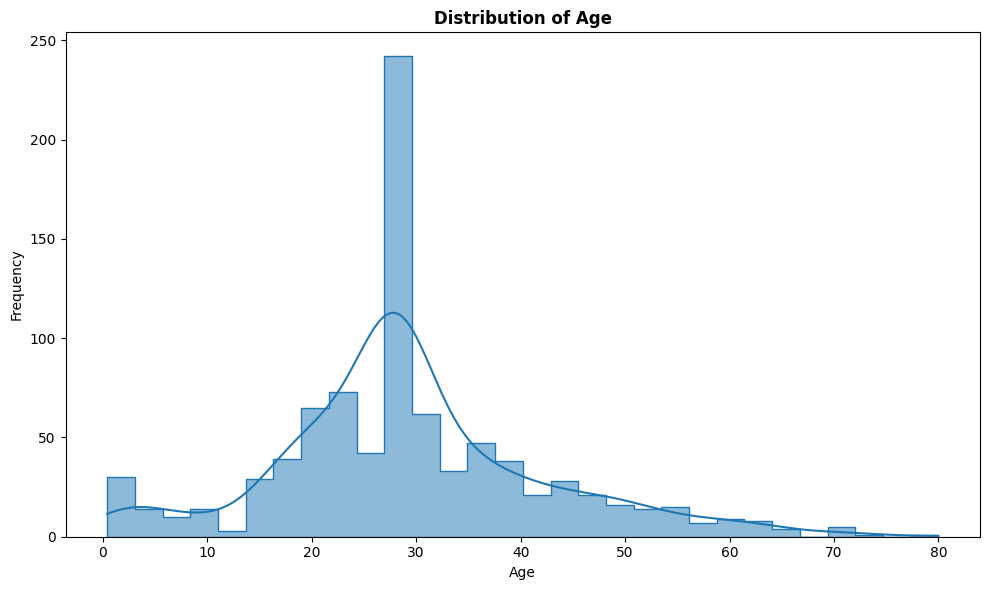

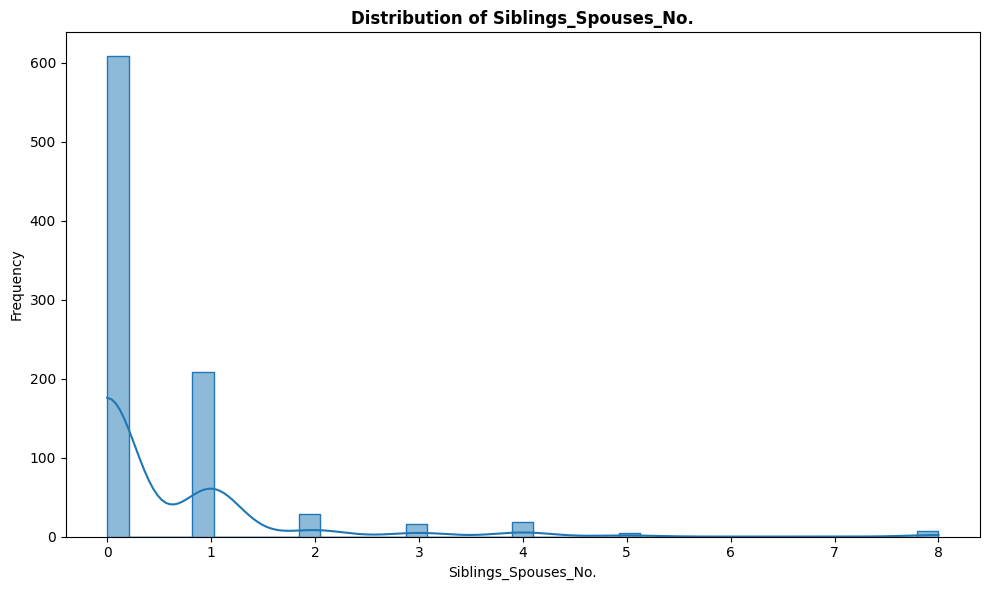

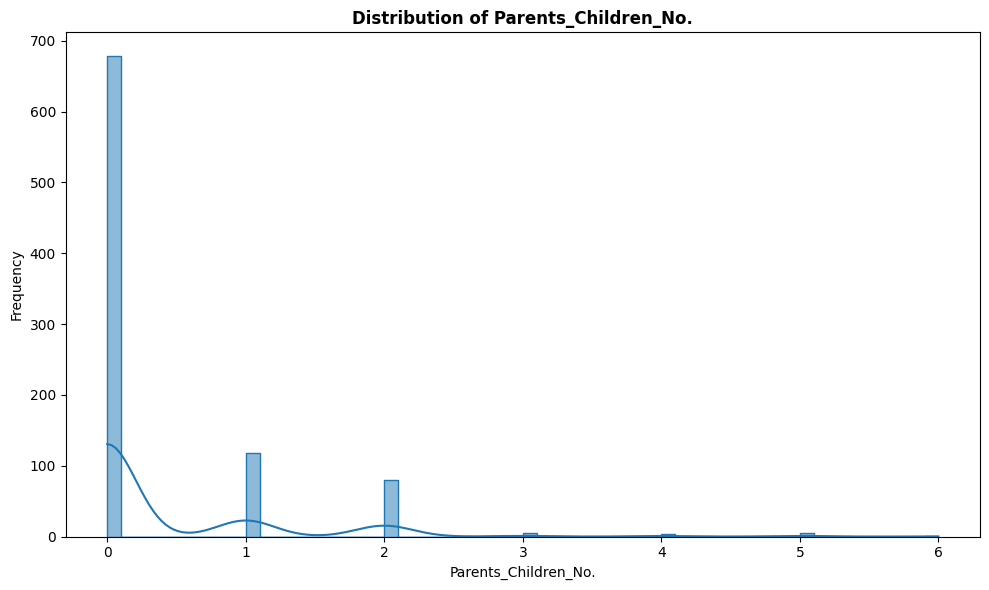

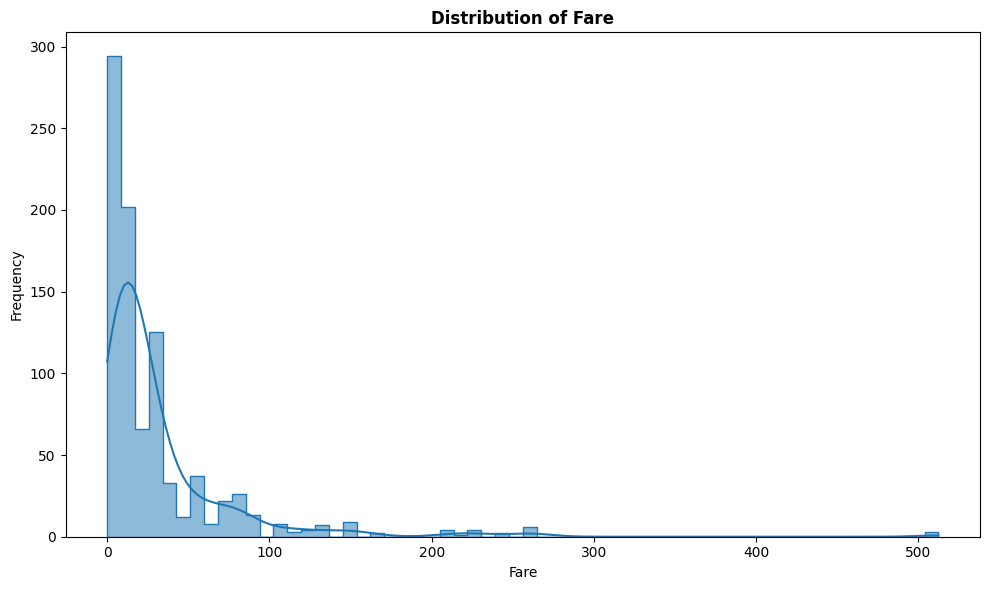

In [7]:
#Numerical features distribution
for col in numerical_cols:
    plt.figure(figsize=(10,6),dpi=100)
    sns.histplot(data=df,
                 x=col,
                 kde=True,
                 element='step')
    plt.title(f'Distribution of {col}',fontdict={'fontsize':12,'fontweight':'bold'})
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_19408\4046979454.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.countplot(data=df,


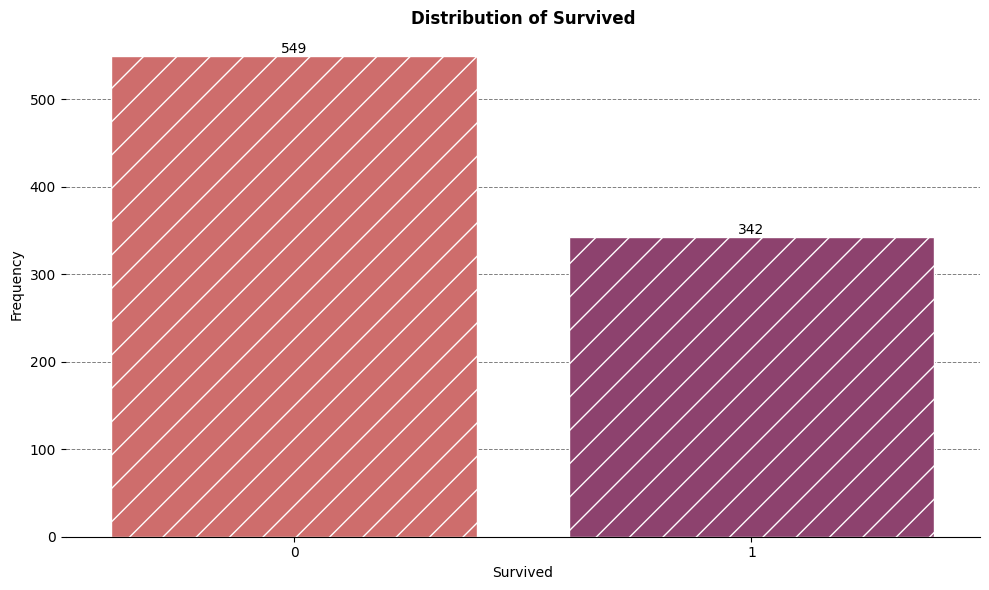

C:\Users\User\AppData\Local\Temp\ipykernel_19408\4046979454.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.countplot(data=df,


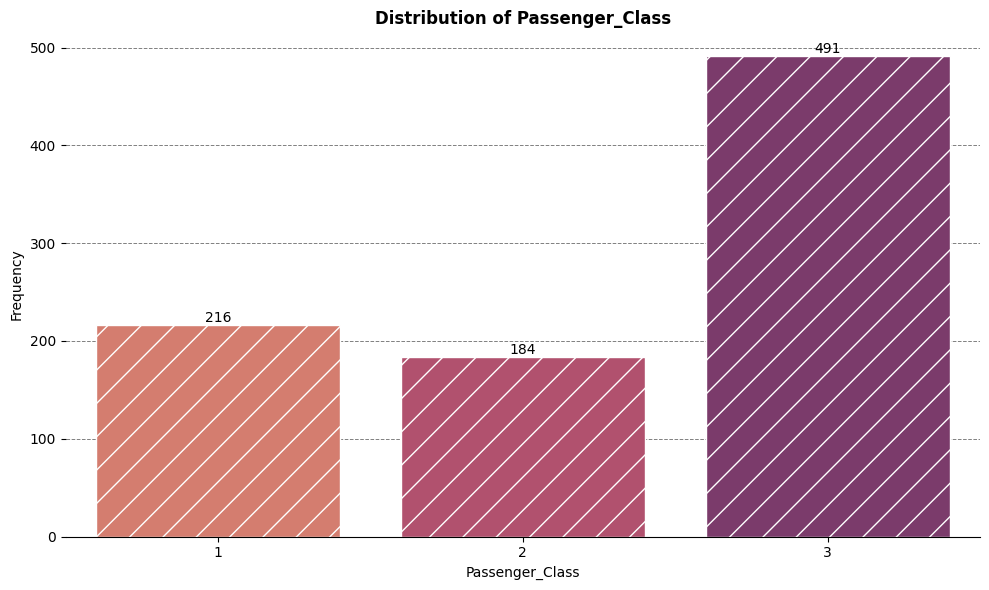

C:\Users\User\AppData\Local\Temp\ipykernel_19408\4046979454.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.countplot(data=df,


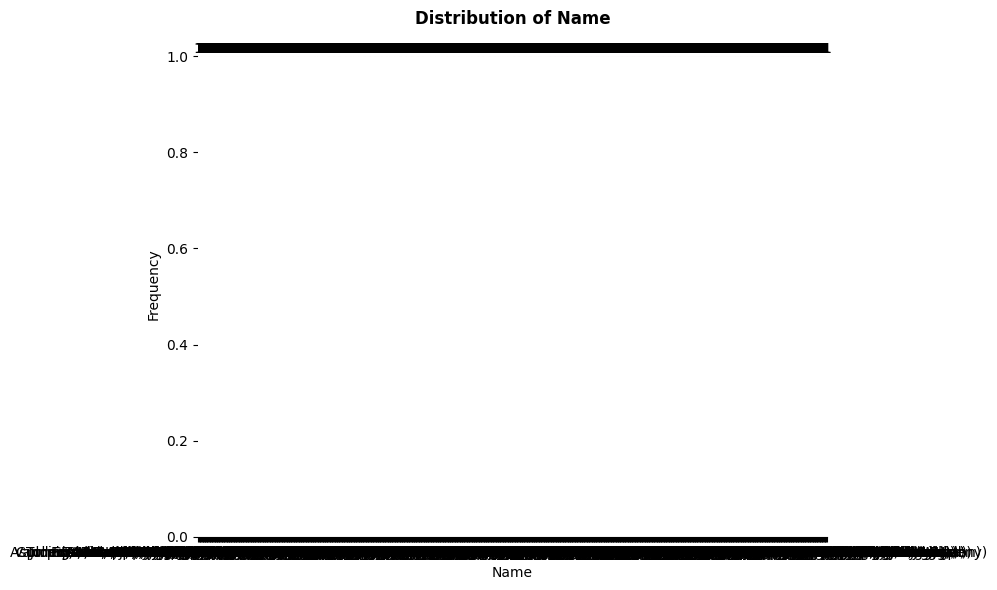

C:\Users\User\AppData\Local\Temp\ipykernel_19408\4046979454.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.countplot(data=df,


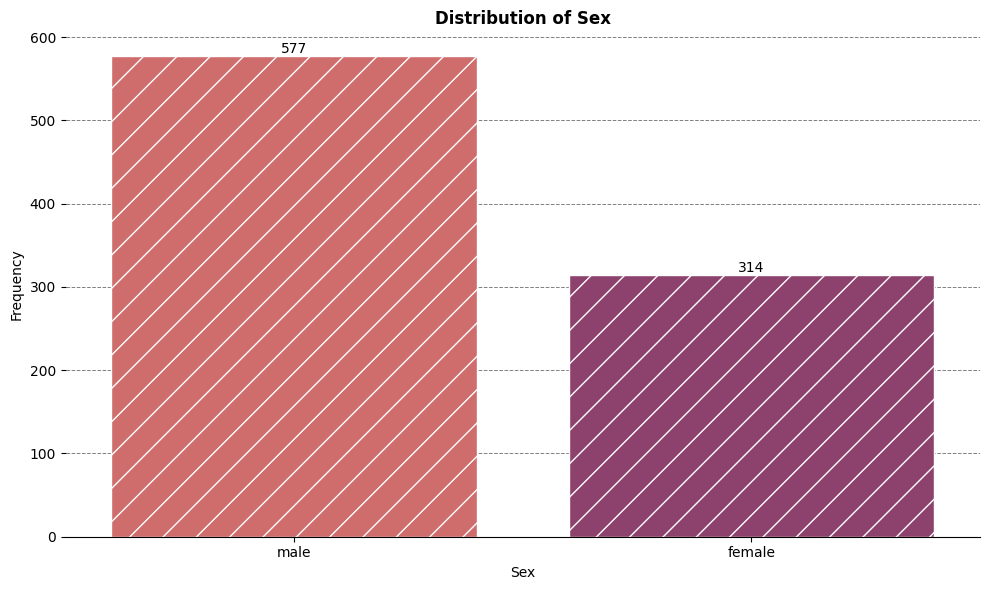

C:\Users\User\AppData\Local\Temp\ipykernel_19408\4046979454.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.countplot(data=df,


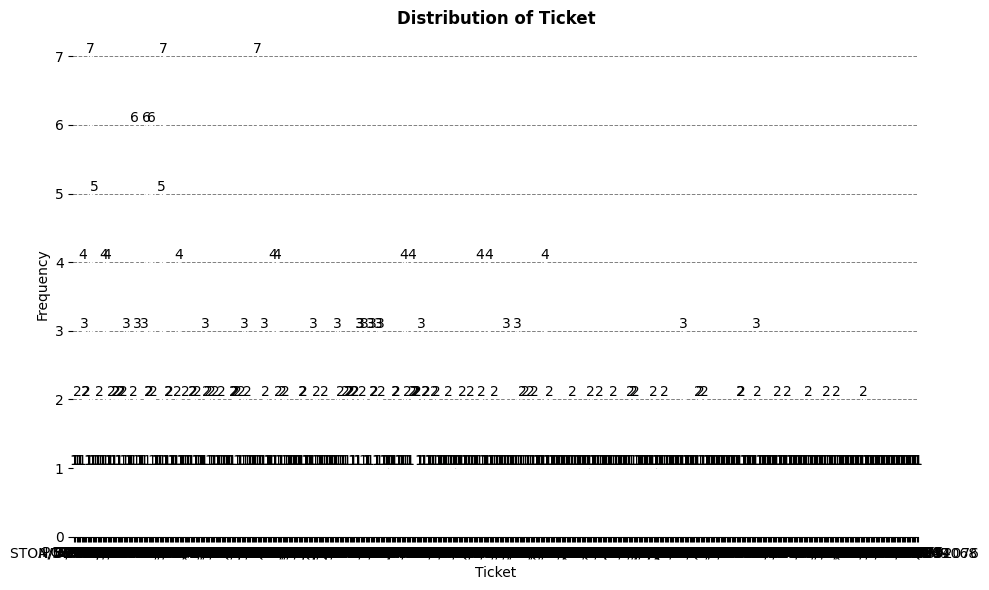

C:\Users\User\AppData\Local\Temp\ipykernel_19408\4046979454.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.countplot(data=df,


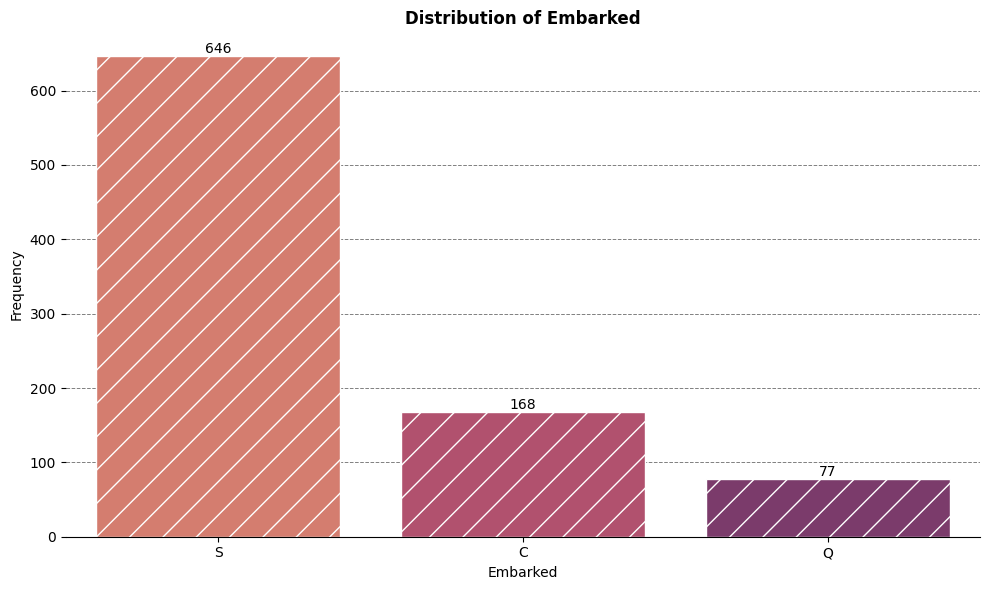

In [8]:
for col in categorical_cols:
    plt.figure(figsize=(10,6),dpi=100)
    bars = sns.countplot(data=df,
                  x=col,
                  palette='flare')
    for bar in bars.patches:
        y_val = bar.get_height()
        x_pos = bar.get_x() + (bar.get_width()/2)
        if y_val > 0:
            plt.text(x_pos,y_val,int(y_val),ha='center',va='bottom')
        bar.set_edgecolor('white')
        bar.set_hatch('/')
    sns.despine(left=True)
    plt.gca().set_axisbelow(True)
    plt.grid(axis='y',linestyle='--',linewidth=0.7,color='gray')
    plt.title(f'Distribution of {col}',fontdict={'fontsize':12,'fontweight':'bold'})
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
    


C:\Users\User\AppData\Local\Temp\ipykernel_19408\3077537144.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.countplot(data=data,


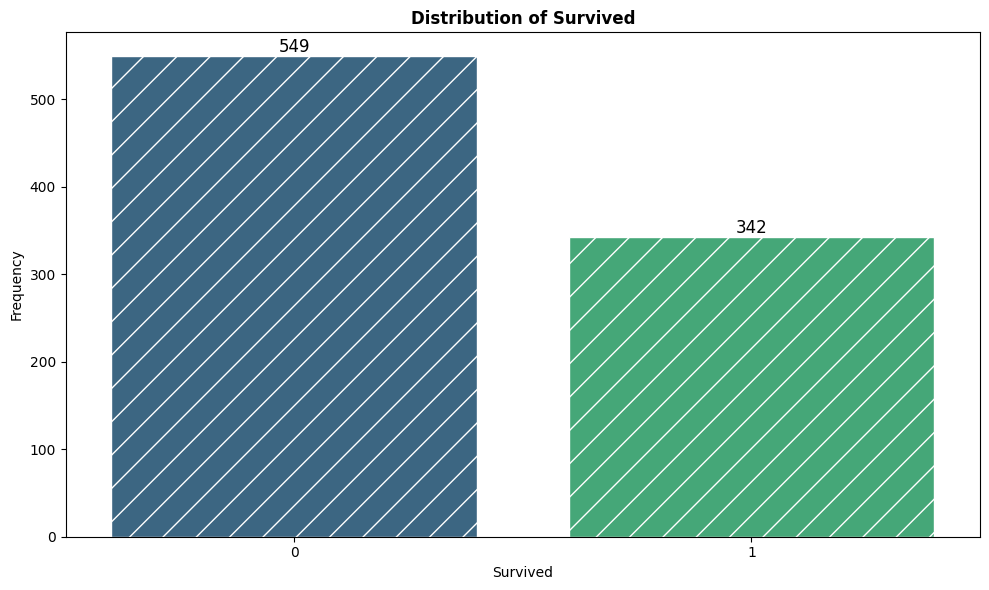

In [9]:
# Univariate Analysis Function
def univariate_Analysis(data,column):
        if data[column].dtype in ['int64','float64','Int64']:
            plt.figure(figsize=(10,6),dpi=100)
            sns.histplot(data=data,
                         x=column,
                         kde=True,
                         element='step')
            plt.title(f'Distribution of {column}',fontdict={'fontsize':12,'fontweight':'bold'})
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.tight_layout()
            plt.show()
        elif data[column].dtype in ['object','category']:
            plt.figure(figsize=(10,6),dpi=100)
            bars = sns.countplot(data=data,
                                 x=column,
                                 palette='viridis')
            for bar in bars.patches:
                y_val = bar.get_height()
                x_pos = bar.get_x() + (bar.get_width()/2)
                if y_val > 0:
                    plt.text(x_pos,y_val,int(y_val),ha='center',va='bottom',fontsize=12)
                bar.set_edgecolor('white')
                bar.set_hatch('/')
            plt.title(f'Distribution of {column}',fontdict={'fontsize':12,'fontweight':'bold'})
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.tight_layout()
            plt.show()
univariate_Analysis(df,'Survived')


## Bivariate Analysis

,PassengerId,Survived,Passenger_Class,Name,Sex,Age,Siblings_Spouses_No.,Parents_Children_No.,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: proportion, dtype: float64

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

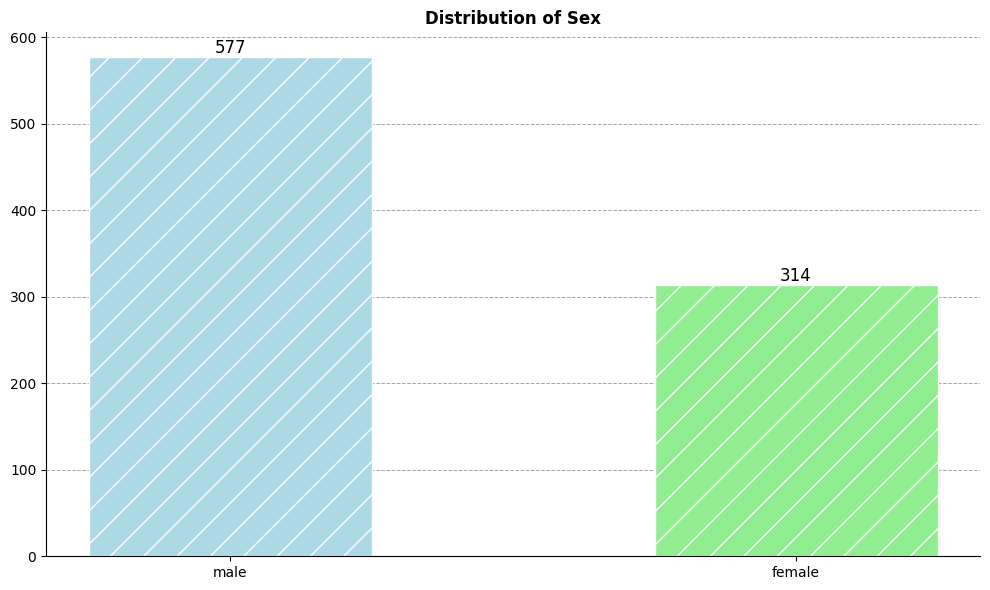

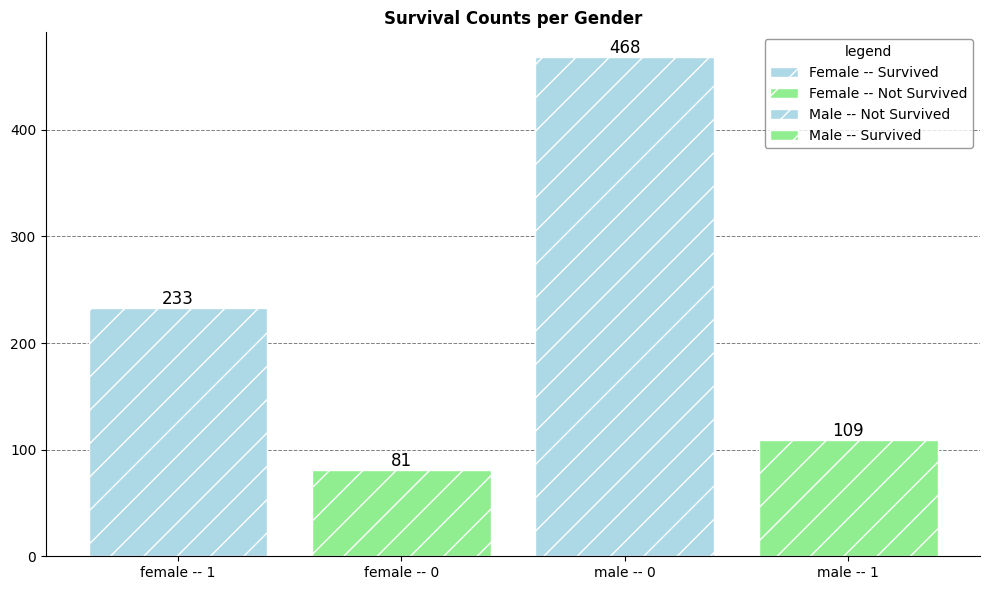

Survival counts per Gender using seaborn:



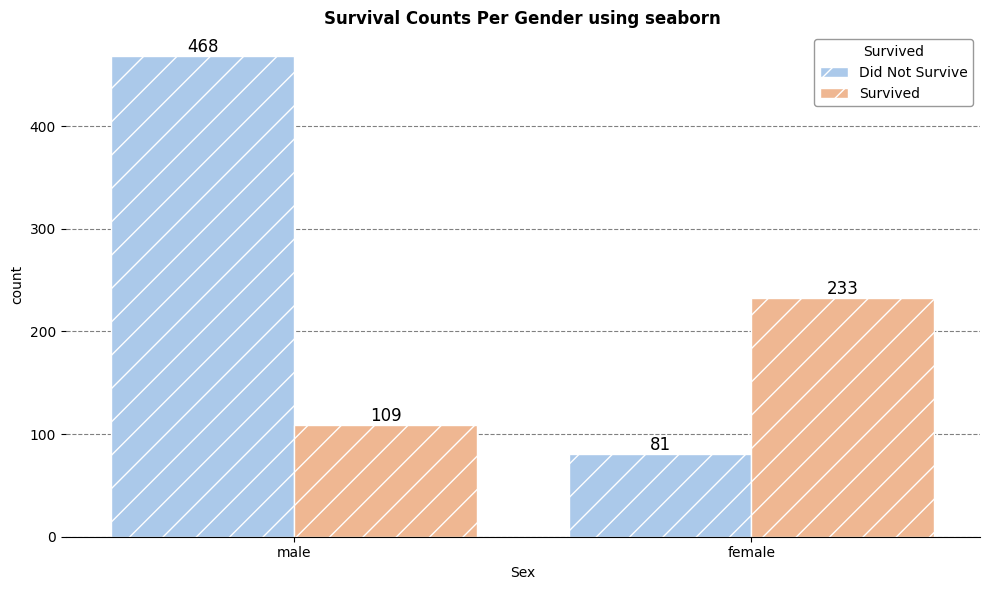

In [10]:
# Checking the relation between survival and other features 
df['Survived'] = pd.to_numeric(df['Survived'])
display(df.head())

# exploring the relation between the sex and being survived:

display(df.groupby('Sex')['Survived'].value_counts(normalize=True))
display(df.groupby('Sex')['Survived'].mean())

plt.figure(figsize=(10,6),dpi=100)
bars = plt.bar(x=df['Sex'].value_counts().index,
               height=df['Sex'].value_counts().values,
               color=['lightblue','lightgreen'],
               edgecolor='white',
               width=0.5,
               align='center')
for bar in bars:
    y_val = bar.get_height()
    x_pos = (bar.get_width()/2) + bar.get_x()
    plt.text(x_pos,y_val,int(y_val),ha='center',va='bottom',fontsize=12)
    bar.set_hatch('/')
plt.title('Distribution of Sex',fontdict={'fontsize':12,'fontweight':'bold'})
plt.grid(axis='y',linestyle='--',linewidth=0.7,color='gray',alpha=0.7)
plt.gca().set_axisbelow(True)
sns.despine()
plt.tight_layout()
plt.show()


idx = df.groupby('Sex')['Survived'].value_counts().index
vals = df.groupby('Sex')['Survived'].value_counts().values
labels = [f'{sex} -- {survived}' for sex,survived in idx]
legend_labels = ['Female -- Survived','Female -- Not Survived','Male -- Not Survived','Male -- Survived']

plt.figure(figsize=(10,6),dpi=100)
bars = plt.bar(x=labels,
               height=df.groupby('Sex')['Survived'].value_counts().values,
               color=['lightblue','lightgreen'],
               edgecolor='white',
               hatch='/',
               width=0.8,
               align='center')
for bar in bars:
    y_val = bar.get_height()
    x_pos = bar.get_x() + (bar.get_width()/2)
    plt.text(x_pos,y_val,int(y_val),ha='center',va='bottom',fontsize=12)
plt.grid(visible=True,axis='y',linestyle='--',linewidth=0.7,color='gray',alpha=1)
plt.gca().set_axisbelow(True)
sns.despine()
plt.title('Survival Counts per Gender',fontdict={'fontsize':12,'fontweight':'bold'})
plt.legend(handles=bars,title='legend',labels=legend_labels,edgecolor='gray')
plt.tight_layout()
plt.show()

#Another approach using seaborn
print('Survival counts per Gender using seaborn:\n')
plt.figure(figsize=(10,6),dpi=100)
bars = sns.countplot(data=df,
                     x=df['Sex'],
                     hue=df['Survived'],
                     palette='pastel')
for bar in bars.patches:
    y_val = bar.get_height()
    x_pos = bar.get_x() + (bar.get_width()/2)
    if y_val > 0:
        plt.text(x_pos,y_val,int(y_val),ha='center',va='bottom',fontsize=12)
    bar.set_edgecolor('white')
    bar.set_hatch('/')
sns.despine(left=True)
plt.gca().set_axisbelow(True)
plt.grid(visible=True,axis='y',linestyle='--',linewidth=0.8,color='gray')
plt.title('Survival Counts Per Gender using seaborn',fontdict={'fontsize':12,'fontweight':'bold'})
plt.legend(title='Survived',labels=['Did Not Survive','Survived'],edgecolor='gray')
plt.tight_layout()
plt.show()


('female', 0)

array([74.2 , 25.8 , 81.11, 18.89])

Sex     Survived
female  1           74.20
        0           25.80
male    0           81.11
        1           18.89
Name: proportion, dtype: float64

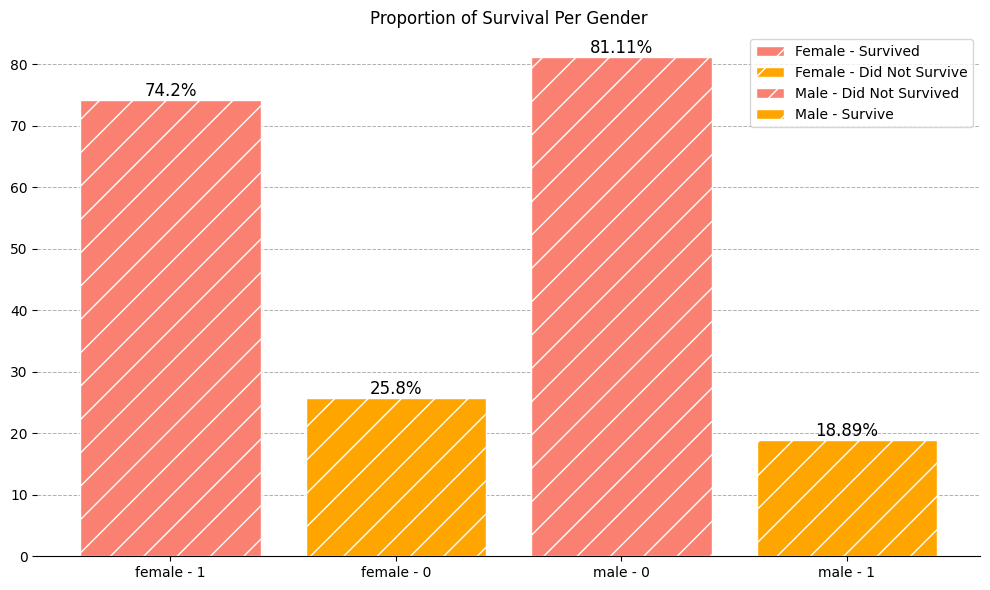

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

MultiIndex([('female', 1),
            ('female', 0),
            (  'male', 0),
            (  'male', 1)],
           names=['Sex', 'Survived'])

np.float64(0.25796178343949044)

In [11]:
# Survival Percentage per Gender
Survival_percentage = np.round(df.groupby('Sex')['Survived'].value_counts(normalize=True)*100,2)
display(Survival_percentage.index.to_list()[1])
display(Survival_percentage.values)
display(Survival_percentage)
labels = [f'{sex} - {survived}' for sex,survived in Survival_percentage.index]
plt.figure(figsize=(10,6),dpi=100)
plt.bar(x=labels,
        height=Survival_percentage.values,
        color=['salmon','orange'],
        width=0.8,
        edgecolor='white',
        hatch='/',
        align='center',
        label=labels)
for i in range(len(Survival_percentage.values)):
    plt.text(i,Survival_percentage.values[i],f'{Survival_percentage.values[i]}%',ha='center',va='bottom',fontsize=12)
plt.grid(visible=True,axis='y',linestyle='--',linewidth=0.7)
plt.gca().set_axisbelow(True)
sns.despine(left=True)
plt.legend(labels=['Female - Survived','Female - Did Not Survive','Male - Did Not Survived','Male - Survive'])
plt.title('Proportion of Survival Per Gender')
plt.tight_layout()
plt.show()

# Another approach for later due to it is complicated now
Survival_counts = df.groupby('Sex')['Survived'].value_counts()
idx = [f'{sex} - {survived}' for sex,survived in Survival_counts.index]
'''print('Values\n',Survival_counts.values)
plt.Figure(figsize=(10,6),dpi=100)
bars = plt.bar(x=idx,
        height=Survival_counts.values,
        width=0.6,
        color=['pink','babyblue'],
        align='center',
        edgecolor='white',
        hatch='/')
for bar in bars:
    y_value = bar.get_height()
    x_pos = bar.get_x() + (bar.get_width()/2)
    plt.text(x_pos,y_value,)'''
Survival_counts.shape
display(Survival_counts)
display(Survival_counts.index)
display(Survival_counts.values[1]/Survival_counts.values[0:2].sum())

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

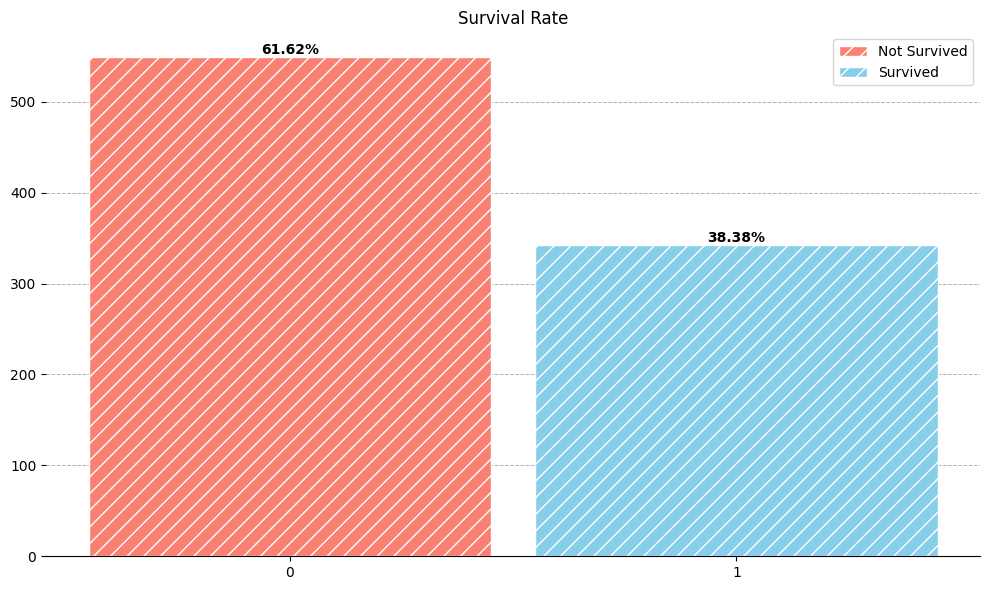

In [12]:
# Survival Rate overall
display(df.Survived.value_counts(normalize=True))
plt.figure(figsize=(10,6),dpi=100)
bars = plt.bar(x=df.Survived.value_counts().index,
               height=df['Survived'].value_counts().values,
               color=['salmon','skyblue'],
               width=0.9,
               align='center',
               label=['Not Survived','Survived'],
               edgecolor='white',
               hatch='//')
for bar in bars:
    y_val = bar.get_height()
    x_pos = bar.get_x() + (bar.get_width()/2)
    plt.text(x_pos,y_val,(f'{np.round((y_val/len(df['Survived'])*100),2)}%'),ha='center',va='bottom',fontdict={'fontsize':10,'fontweight':'bold'})
plt.grid(visible=True,axis='y',linestyle='--',linewidth=0.7)
plt.gca().set_axisbelow(True)
sns.despine(left=True)
plt.legend()
plt.title('Survival Rate')
plt.xticks(df['Survived'].unique())
plt.tight_layout()
plt.show()


In [13]:
# 1- Checking which passenger class has the highest survival rate. 
# 2- And then check the distribution of gender in each class. 
# 3- And the survival rate per passenger class per gender.
#display(df.head())
print('Survival Rate per Passenger Class\n',df.groupby('Passenger_Class')['Survived'].mean())
print('Survival Counts per Passenger Class\n',df.groupby('Passenger_Class')['Survived'].value_counts())
print('Survival Counts per Passenger Class divided per gender\n',df.groupby(['Passenger_Class','Sex'])['Survived'].value_counts())
print('Survival Percentages per Passenger Class divided per gender\n',df.groupby(['Passenger_Class','Sex'])['Survived'].value_counts(normalize=True))
print('Gender Counts per Passenger Class\n',df.groupby('Passenger_Class')['Sex'].value_counts())

Survival Rate per Passenger Class
 Passenger_Class
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Survival Counts per Passenger Class
 Passenger_Class  Survived
1                1           136
                 0            80
2                0            97
                 1            87
3                0           372
                 1           119
Name: count, dtype: int64
Survival Counts per Passenger Class divided per gender
 Passenger_Class  Sex     Survived
1                female  1            91
                         0             3
                 male    0            77
                         1            45
2                female  1            70
                         0             6
                 male    0            91
                         1            17
3                female  0            72
                         1            72
                 male    0           300
                         1            47
Name: c

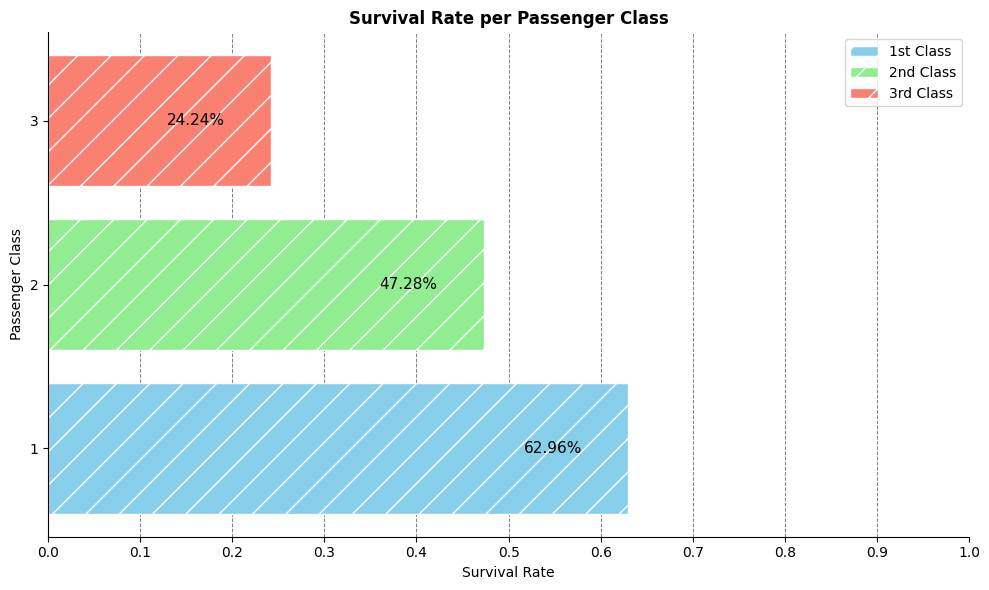

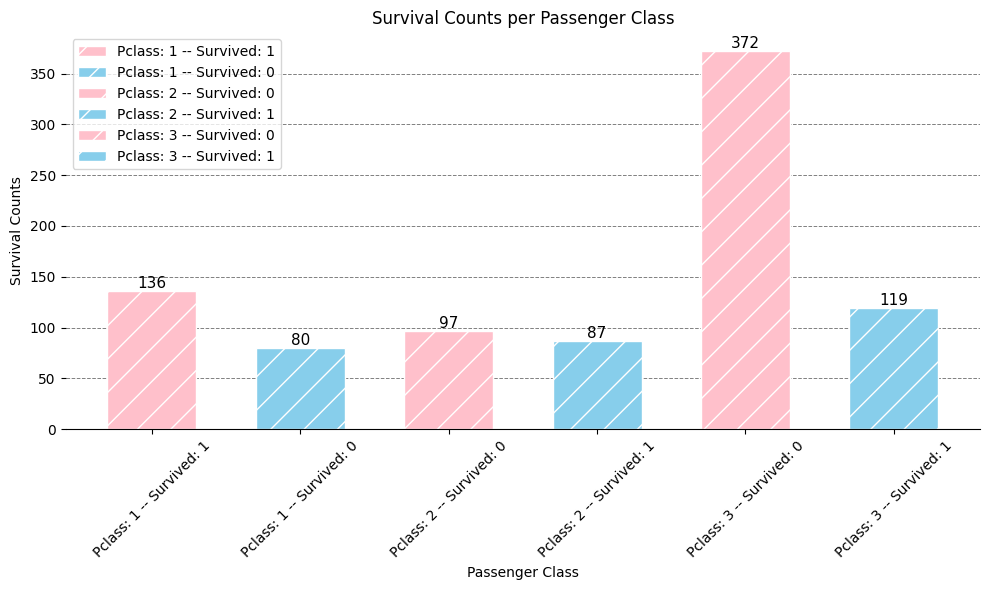

In [14]:
#Survival Rate per Passenger Class

plt.figure(figsize=(10,6),dpi=100)
bars = plt.barh(y=df.groupby('Passenger_Class')['Survived'].mean().index,
         width=df.groupby('Passenger_Class')['Survived'].mean().values,
         height=0.8,
         align='center',
         color=['skyblue','lightgreen','salmon'],
         edgecolor='white',
         hatch='/')
for bar in bars:
    x_val = bar.get_width()
    y_pos = bar.get_y() + (bar.get_height()/2)
    plt.text(x_val-0.05,y_pos,f'{round((x_val*100),2)}%',ha='right',va='center',color='black',fontsize=11)
plt.grid(visible=True,axis='x',linestyle='--',linewidth=0.7,color='gray')
# --> plt.set_axisbelow(True), this will not work because the set_axisbelow is a method of the Axes object
#not the matplotlib.pyplot module, so we need to get the Axes object by plt.gca().
plt.gca().set_axisbelow(True)
plt.legend(handles=bars,labels=['1st Class','2nd Class','3rd Class'])
plt.title('Survival Rate per Passenger Class',fontdict={'fontsize':12,'fontweight':'bold'})
plt.yticks(df.groupby('Passenger_Class')['Survived'].mean().index)#we also can do this [3,2,1]
plt.xticks(np.arange(0,1.1,0.1))
plt.ylabel('Passenger Class')
plt.xlabel('Survival Rate')
sns.despine()
plt.tight_layout()
plt.show()

#Survival Counts per passenger Class
idx = [f'Pclass: {Pclass} -- Survived: {survived}' for Pclass,survived in df.groupby('Passenger_Class')['Survived'].value_counts().index]
plt.figure(figsize=(10,6),dpi=100)
bars = plt.bar(x=idx,
        height=df.groupby('Passenger_Class')['Survived'].value_counts().values,
        align='center',
        color=['pink','skyblue'],
        edgecolor='white',
        hatch='/',
        width=0.6,
        label=idx)
for bar in bars:
    y_val = bar.get_height()
    x_pos = bar.get_x() + (bar.get_width()/2)
    plt.text(x_pos,y_val,y_val,ha='center',va='bottom',fontsize=11)
plt.gca().set_axisbelow(True)
plt.grid(visible=True,axis='y',linestyle='--',linewidth=0.7,color='gray')
plt.legend()
plt.title('Survival Counts per Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Counts')
plt.xticks(rotation=45)
sns.despine(left=True)
plt.tight_layout()
plt.show()

#df.groupby('Passenger_Class')['Sex'].value_counts().index

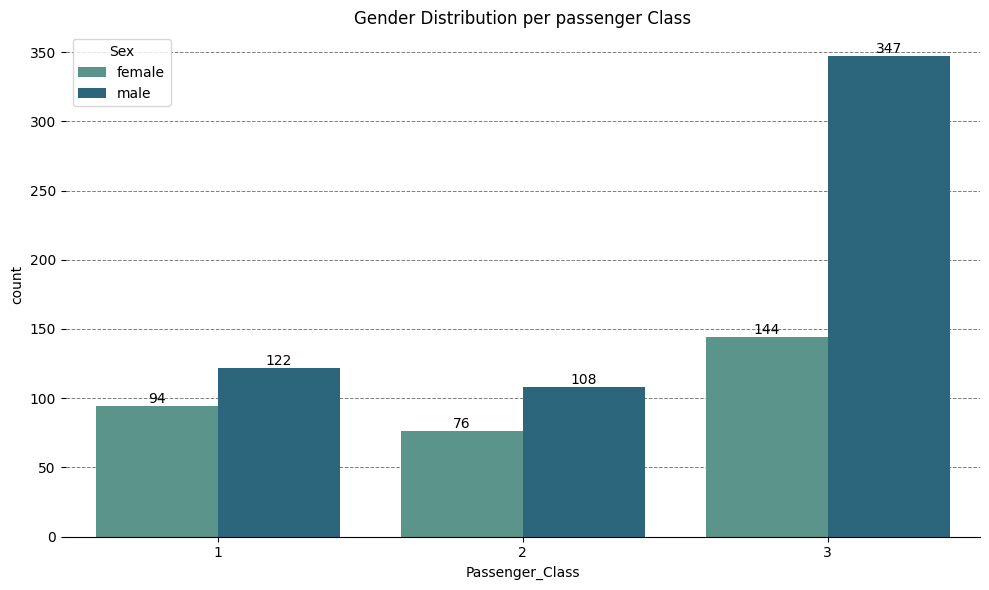

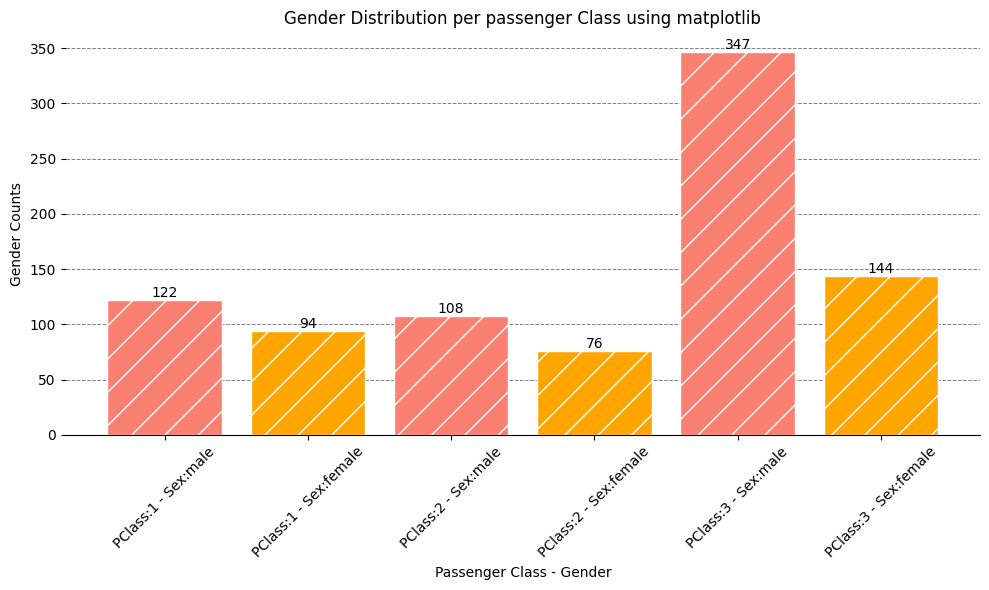

In [15]:
# Gender Distribution per passenger Class

plt.figure(figsize=(10,6),dpi=100)
bars = sns.countplot(data=df,
              x='Passenger_Class',
              hue='Sex',
              width=0.8,
              palette='crest')
for bar in bars.patches:
    y_val = bar.get_height()
    x_pos = bar.get_x() + (bar.get_width()/2)
    if y_val > 0:
        plt.text(x_pos,y_val,int(y_val),ha='center',va='bottom')
plt.title('Gender Distribution per passenger Class')
plt.grid(visible=True,axis='y',linestyle='--',linewidth=0.7,color='gray')
plt.gca().set_axisbelow(True)
sns.despine(left=True)
plt.tight_layout()
plt.show() 

# The same plot using another approach (matplotlib)

plt.figure(figsize=(10,6),dpi=100)
bars = plt.bar(x=[f'PClass:{pclass} - Sex:{sex}' for pclass,sex in df.groupby('Passenger_Class')['Sex'].value_counts().index],
        height=df.groupby('Passenger_Class')['Sex'].value_counts().values,
        align='center',
        color=['salmon','orange'],
        edgecolor='white',
        hatch='/')
for bar in bars:
    y_val = bar.get_height()
    x_pos = bar.get_x() + (bar.get_width()/2)
    plt.text(x_pos,y_val,int(y_val),ha='center',va='bottom')
plt.grid(visible=True,axis='y',linestyle='--',linewidth=0.7,color='gray')
plt.gca().set_axisbelow(True)
sns.despine(left=True)
plt.title('Gender Distribution per passenger Class using matplotlib')
plt.xlabel('Passenger Class - Gender')
plt.ylabel('Gender Counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



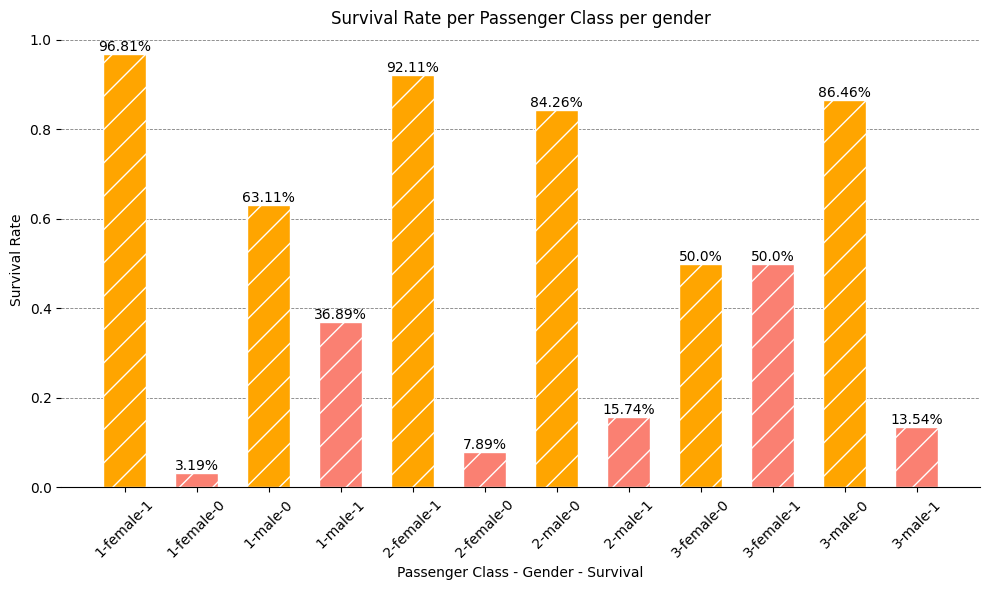

In [16]:
# Survival Rate per Passenger Class per gender
idx = [ f'{Pclass}-{sex}-{survived}' for Pclass,sex,survived in df.groupby(['Passenger_Class','Sex'])['Survived'].value_counts().index]
plt.figure(figsize=(10,6),dpi=100)
bars = plt.bar(x=idx,
               height=df.groupby(['Passenger_Class','Sex'])['Survived'].value_counts(normalize=True).values,
               align='center',
               width=0.6,
               color=['orange','salmon'],
               edgecolor='white',
               hatch='/')
for bar in bars:
    y_val = bar.get_height()
    x_pos = bar.get_x() + (bar.get_width()/2)
    plt.text(x_pos,y_val,f'{np.round((y_val*100),2)}%',ha='center',va='bottom')
plt.grid(visible=True,axis='y',linestyle='--',linewidth=0.6,color='gray')
plt.gca().set_axisbelow(True)
sns.despine(left=True)
plt.title('Survival Rate per Passenger Class per gender')
plt.xticks(rotation=45)
plt.xlabel('Passenger Class - Gender - Survival')
plt.ylabel('Survival Rate')
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_19408\2072332222.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,


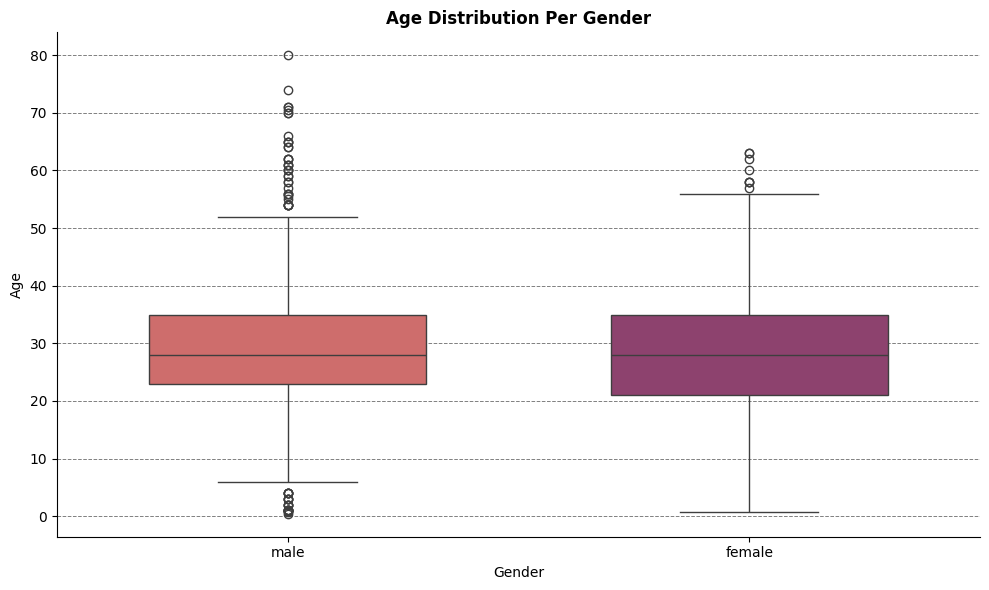

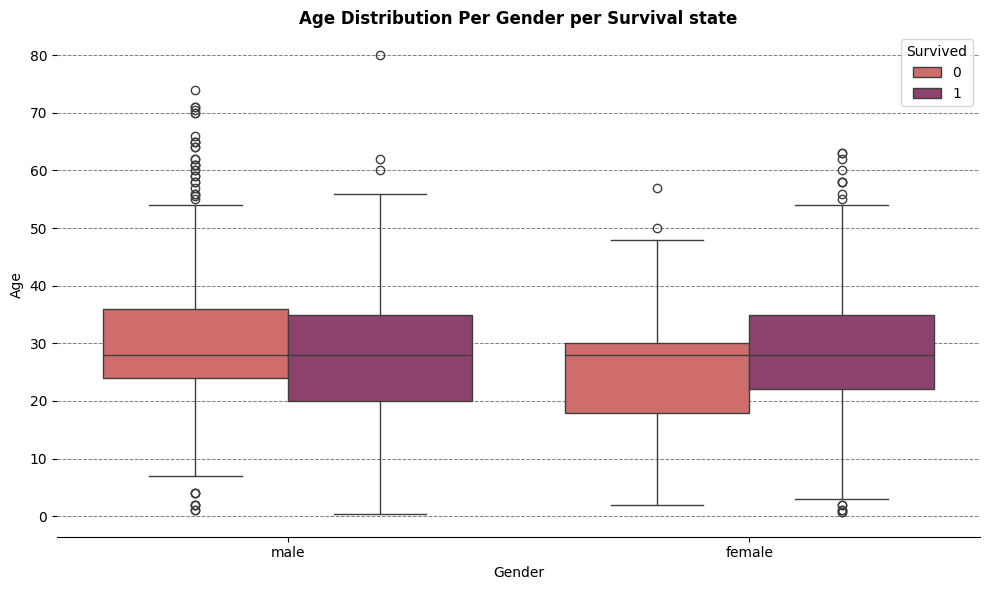

In [17]:
# Age Distribution Per Gender
plt.figure(figsize=(10,6),dpi=100)
sns.boxplot(data=df,
              x='Sex',
              y='Age',
              palette='flare',
              width=0.6)
plt.grid(visible=True,axis='y',linestyle='--',linewidth=0.7,color='gray')
plt.gca().set_axisbelow(True)
sns.despine()
plt.title('Age Distribution Per Gender',fontdict={'fontsize':12,'fontweight':'bold'})
plt.xlabel('Gender')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

# Gender Age Distribution per Survived
plt.figure(figsize=(10,6),dpi=100)
sns.boxplot(data=df,
              x='Sex',
              y='Age',
              hue='Survived',
              palette='flare',
              width=0.8)
plt.grid(visible=True,axis='y',linestyle='--',linewidth=0.7,color='gray')
plt.gca().set_axisbelow(True)
sns.despine(left=True)
plt.title('Age Distribution Per Gender per Survival state',fontdict={'fontsize':12,'fontweight':'bold'})
plt.xlabel('Gender')
plt.ylabel('Age')
plt.tight_layout()
plt.show()


##### The age group per survived analysis, and for each embarkation I can see what are the age groups for each one and what are the survival rate for each group per embarkation

In [31]:
# 1- which Embarkation has the heighest survival rate?
# 2- What are the survival counts per embarkation?
# 3- What is the gender distribution per embarkation?
# 4- What is the survival proportion per gender per embarkation?  
print(f'The Survival Rate per Embarkation: \n {df.groupby('Embarked')['Survived'].mean()}\n')
print(f'The Survival Counts per embarkation:\n{df.groupby('Embarked')['Survived'].value_counts()}\n')
print(f'The Gender distribution per Embarkation:\n{df.groupby('Embarked')['Sex'].value_counts()}\n')
print(f'The Survival counts per gender in each embarkation:\n{df.groupby(['Embarked','Sex'])['Survived'].value_counts()}\n')
print(f'The Survival rate per gender in each embarkation:\n{df.groupby(['Embarked','Sex'])['Survived'].mean()}\n')

The Survival Rate per Embarkation: 
 Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

The Survival Counts per embarkation:
Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           219
Name: count, dtype: int64

The Gender distribution per Embarkation:
Embarked  Sex   
C         male       95
          female     73
Q         male       41
          female     36
S         male      441
          female    205
Name: count, dtype: int64

The Survival counts per gender in each embarkation:
Embarked  Sex     Survived
C         female  1            64
                  0             9
          male    0            66
                  1            29
Q         female  1            27
                  0             9
          male    0            38
                  1             3
S         female  1           142
                  0        

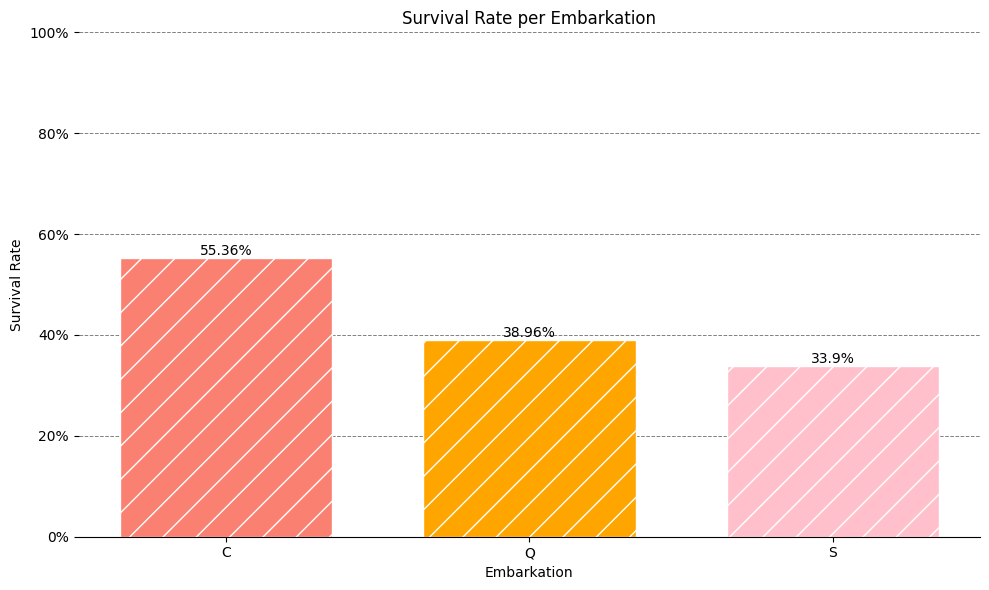

In [48]:
# Visualization of Survival rate per Embarkation
# I need to know how to make that using seaborn's barplot
plt.figure(figsize=(10,6),dpi=100)
bars = plt.bar(x=df.groupby('Embarked')['Survived'].mean().index,
        height=df.groupby('Embarked')['Survived'].mean().values,
        align='center',
        color=['salmon','orange','pink'],
        width=0.7,
        edgecolor='white',
        hatch='/')
for bar in bars:
    y_val = bar.get_height()
    x_pos = bar.get_x() + (bar.get_width()/2)
    plt.text(x_pos,y_val,f'{round((y_val*100),2)}%',ha='center',va='bottom')
plt.grid(visible=True,axis='y',linestyle='--',linewidth=0.7,color='gray')
plt.gca().set_axisbelow(True)
sns.despine(left=True)
plt.title('Survival Rate per Embarkation')
plt.xlabel('Embarkation')
plt.ylabel('Survival Rate')
positions=np.arange(0,1.2,0.2)
labels=[f'{int(i*100)}%' for i in np.arange(0,1.2,0.2)]
plt.yticks(positions,labels)
plt.tight_layout()
plt.show()


In [25]:
df.head()
df['Fare'].max()
df['Fare'].min()
# Filtering for passengers whose fare was 0
df[df['Fare'] == 0]

,PassengerId,Survived,Passenger_Class,Name,Sex,Age,Siblings_Spouses_No.,Parents_Children_No.,Ticket,Fare,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,28.0,0,0,239853,0.0,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,28.0,0,0,239853,0.0,S
466,467,0,2,"Campbell, Mr. William",male,28.0,0,0,239853,0.0,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,28.0,0,0,239854,0.0,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,28.0,0,0,112052,0.0,S


In [19]:
df.head()
df['Parents_Children_No.'].head()
for value in df['Parents_Children_No.']:
    total = value + 1
    
print(total)


1
